Importing Packages

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

Loading and Preprocessing Data

In [20]:
df = pd.read_csv('/content/weatherHistory.csv', parse_dates=['Formatted Date'])
print(df.shape)
print(df.info())
print(df.describe())

(67747, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67747 entries, 0 to 67746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            67747 non-null  object 
 1   Summary                   67747 non-null  object 
 2   Precip Type               67603 non-null  object 
 3   Temperature (C)           67746 non-null  float64
 4   Apparent Temperature (C)  67746 non-null  float64
 5   Humidity                  67746 non-null  float64
 6   Wind Speed (km/h)         67746 non-null  float64
 7   Wind Bearing (degrees)    67746 non-null  float64
 8   Visibility (km)           67746 non-null  float64
 9   Loud Cover                67746 non-null  float64
 10  Pressure (millibars)      67746 non-null  float64
 11  Daily Summary             67746 non-null  object 
dtypes: float64(8), object(4)
memory usage: 6.2+ MB
None
       Temperature (C)  Apparent Temperature (C)    

In [21]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [22]:
selected_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)','Wind Speed (km/h)']
df= df[selected_columns]


In [23]:
df

,Temperature (C),Apparent Temperature (C),Humidity,Pressure (millibars),Wind Speed (km/h)
0,9.472222,7.388889,0.89,1015.13,14.1197
1,9.355556,7.227778,0.86,1015.63,14.2646
2,9.377778,9.377778,0.89,1015.94,3.9284
3,8.288889,5.944444,0.83,1016.41,14.1036
4,8.755556,6.977778,0.83,1016.51,11.0446
...,...,...,...,...,...
67742,24.927778,24.927778,0.50,1001.31,17.3558
67743,23.911111,23.911111,0.50,1000.92,17.0177
67744,23.888889,23.888889,0.53,1000.93,9.0965
67745,22.777778,22.777778,0.62,1000.70,9.7244


In [24]:
print(df.isnull().sum(axis=0) * 100/len(df))

Temperature (C)             0.001476
Apparent Temperature (C)    0.001476
Humidity                    0.001476
Pressure (millibars)        0.001476
Wind Speed (km/h)           0.001476
dtype: float64


In [28]:
df = df.dropna()
df=df.drop_duplicates()
df

,Temperature (C),Apparent Temperature (C),Humidity,Pressure (millibars),Wind Speed (km/h)
0,9.472222,7.388889,0.89,1015.13,14.1197
1,9.355556,7.227778,0.86,1015.63,14.2646
2,9.377778,9.377778,0.89,1015.94,3.9284
3,8.288889,5.944444,0.83,1016.41,14.1036
4,8.755556,6.977778,0.83,1016.51,11.0446
...,...,...,...,...,...
67741,24.811111,24.811111,0.46,1001.66,20.1250
67742,24.927778,24.927778,0.50,1001.31,17.3558
67743,23.911111,23.911111,0.50,1000.92,17.0177
67744,23.888889,23.888889,0.53,1000.93,9.0965


EDA

<Axes: >

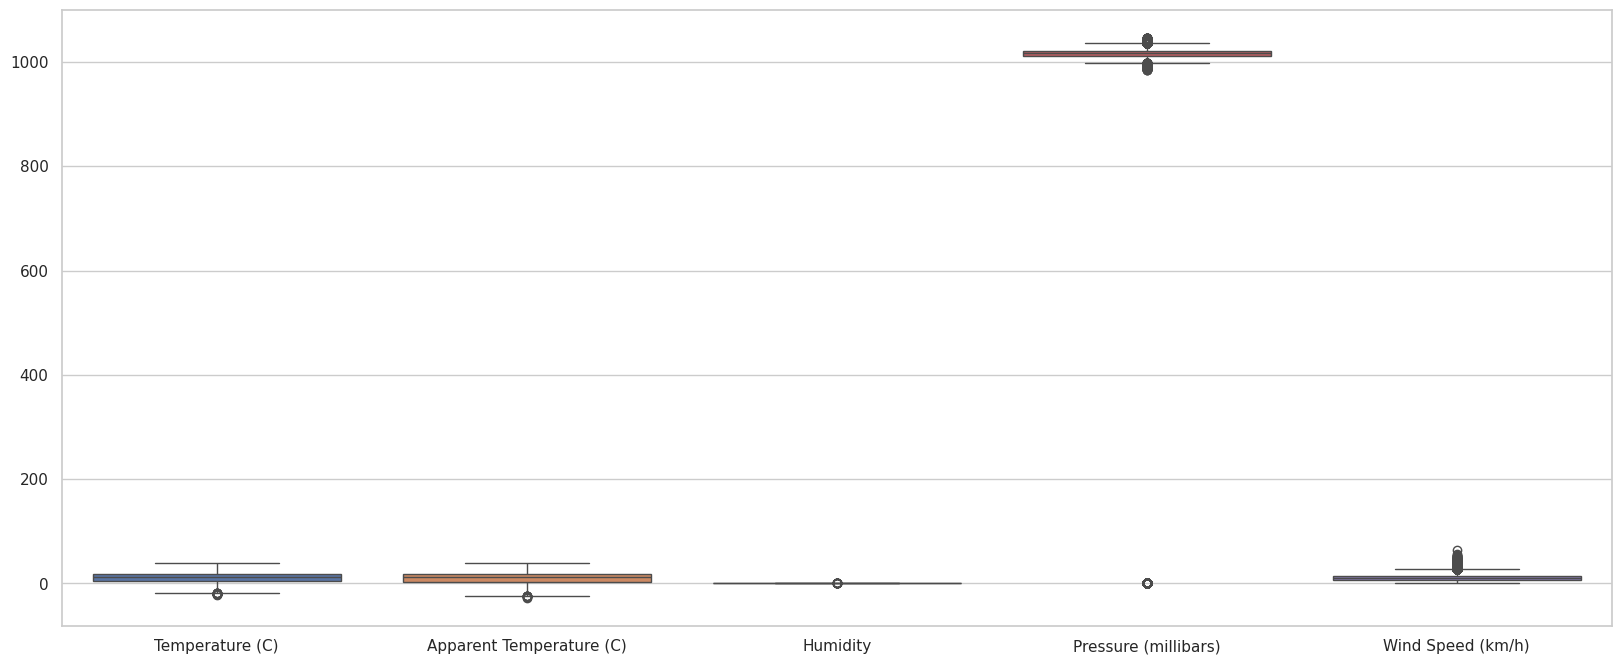

In [29]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data=df)

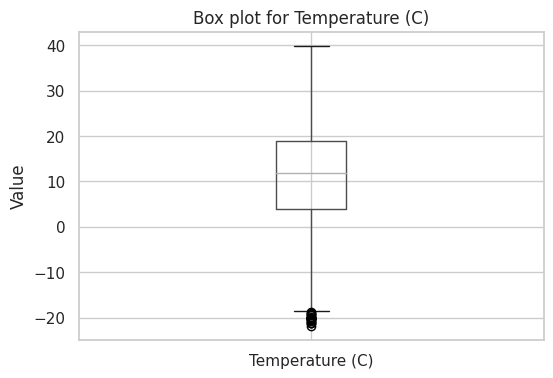

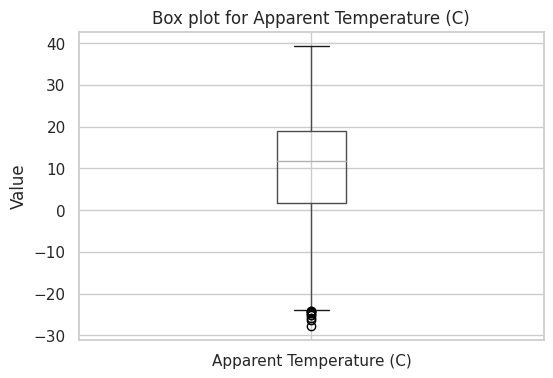

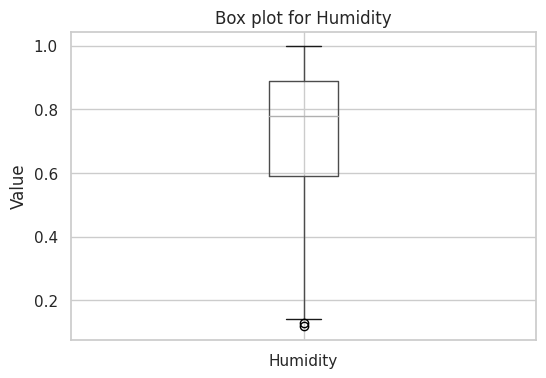

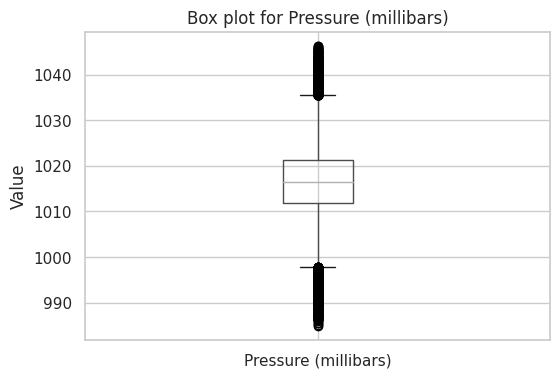

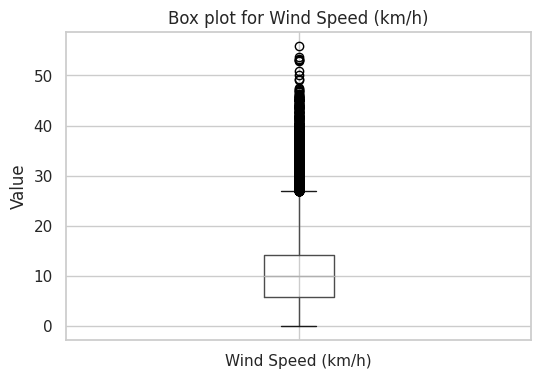

In [32]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[column])
    plt.title('Box plot for {}'.format(column))
    plt.ylabel('Value')
    plt.show()


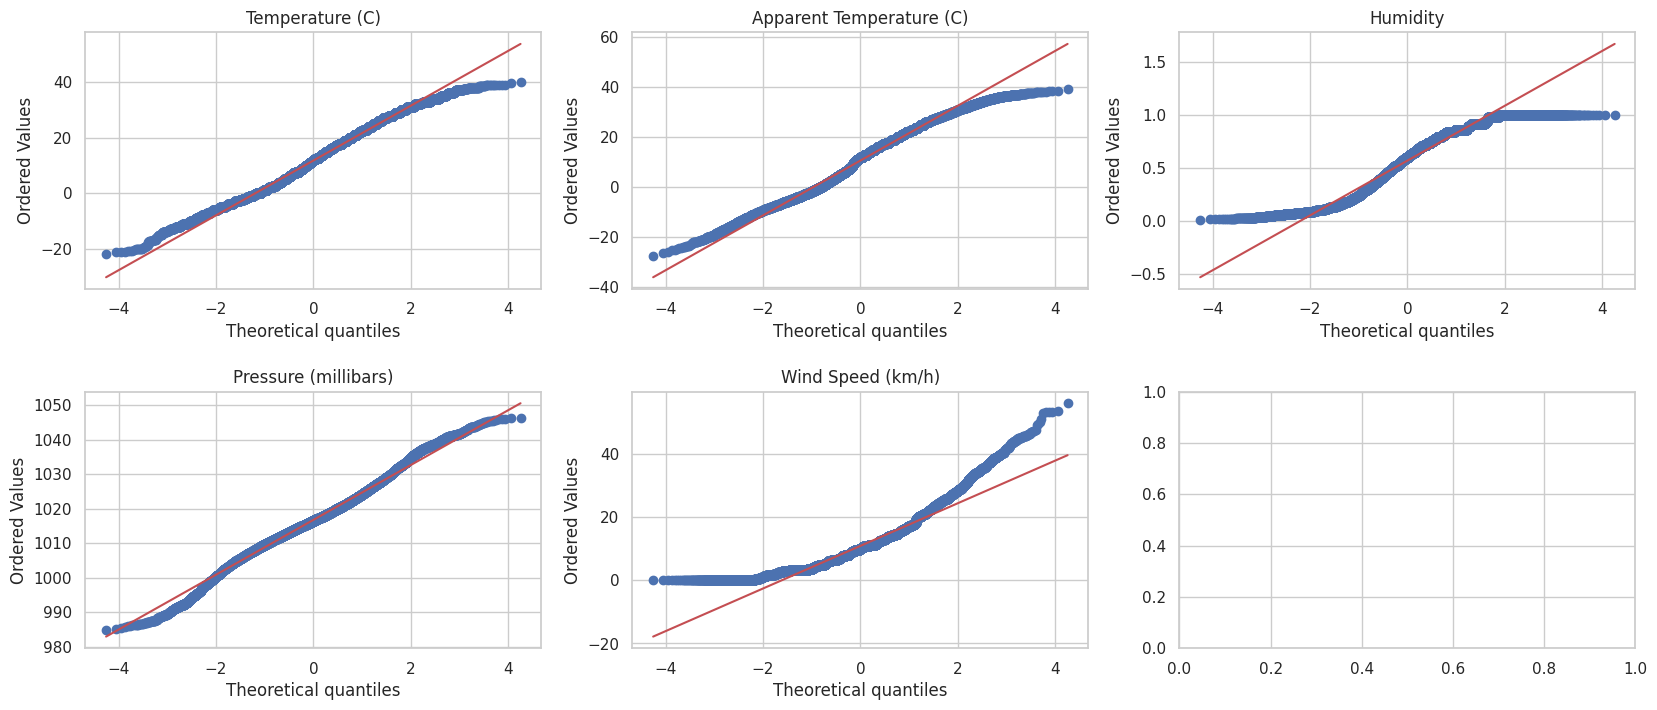

In [45]:
fig, axes = plt.subplots(2,3)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(columns[0:6]):
    stats.probplot(df[column], dist="norm", plot=axes[int(i/3)][i%3])
    axes[int(i/3)][i%3].set_title(column)
plt.show()

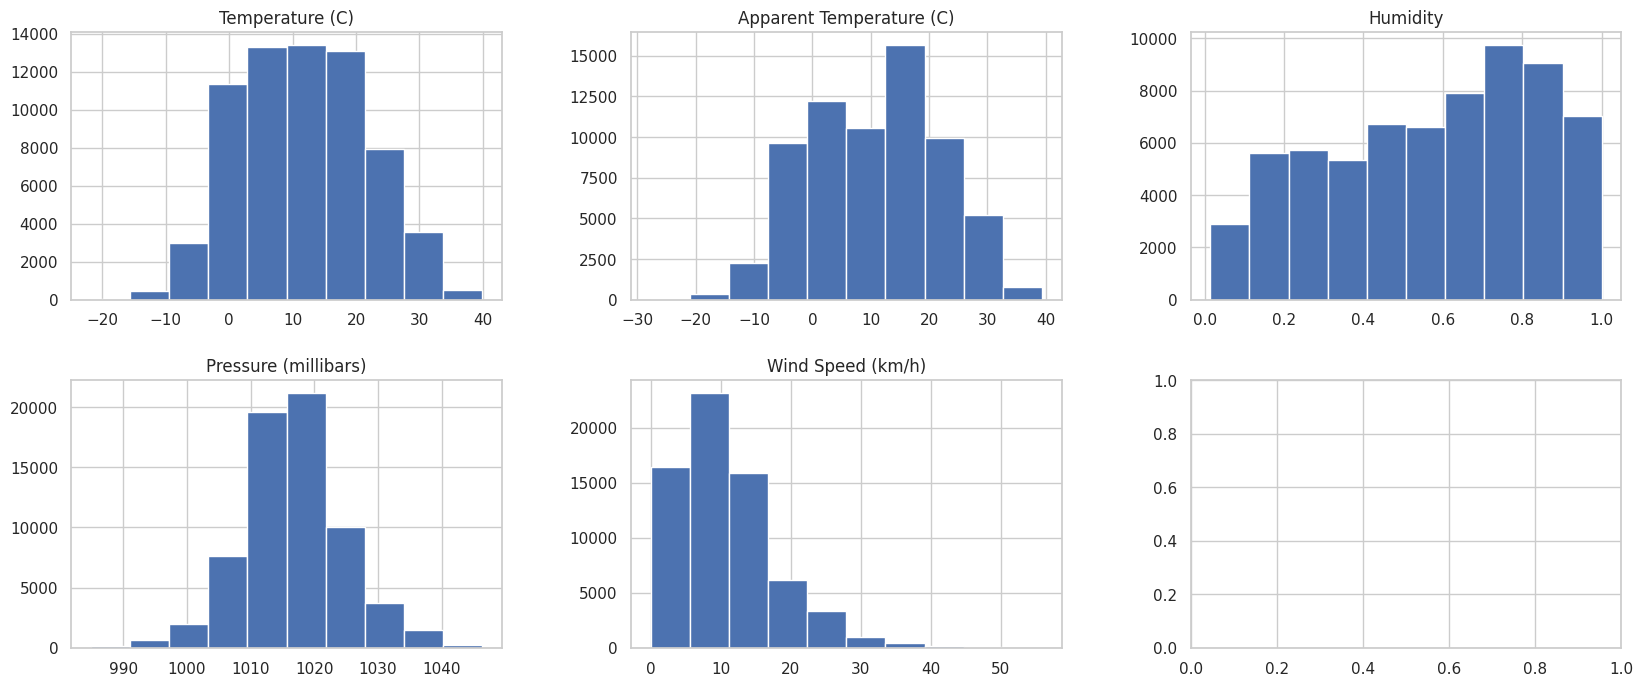

In [46]:
fig, axes = plt.subplots(2,3)
for i, column in enumerate(columns[0:6]):
    temp_df = pd.DataFrame(df[column], columns=[column])
    temp_df.hist(ax=axes[int(i/3)][i%3])
plt.show()

In [77]:
from sklearn.preprocessing import FunctionTransformer
# power transformation with power of 2 for 'Humidity'
power_transformer = FunctionTransformer(lambda x: x**2, validate=True)
data_transformed = power_transformer.transform(df[['Humidity']])
df['Humidity'] = data_transformed


# squre root transformation for 'Wind Speed'
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
data_transformed = sqrt_transformer.transform(df[['Wind Speed (km/h)']])
df['Wind Speed (km/h)'] = data_transformed

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [78]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Apparent Temperature (C)'])  # Features
y = df['Apparent Temperature (C)']  # Target variable

# Split the data into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set shape - Features:", X_test.shape, "Target:", y_test.shape)


Train set shape - Features: (53355, 4) Target: (53355,)
Test set shape - Features: (13339, 4) Target: (13339,)


In [79]:
std_columns = ['Temperature (C)',
               'Humidity',
               'Wind Speed (km/h)',
               'Pressure (millibars)']

In [80]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize feature data
scaler_train = StandardScaler()
scaler_train.fit(x_train[std_columns])
x_train_scaled = scaler_train.transform(x_train[std_columns])
x_test_scaled = scaler_train.transform(x_test[std_columns])
df_x_train_standardized = pd.DataFrame(x_train_scaled, columns=std_columns)
df_x_test_standardized = pd.DataFrame(x_test_scaled, columns=std_columns)

# Standardize target data
scaler_target = StandardScaler()
scaler_target.fit(y_train.values.reshape(-1, 1))  # Reshape y_train to 2D array
y_train_scaled = scaler_target.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))
df_y_train_standardized = pd.DataFrame(y_train_scaled, columns=['Apparent Temperature (C)'])
df_y_test_standardized = pd.DataFrame(y_test_scaled, columns=['Apparent Temperature (C)'])


<Axes: >

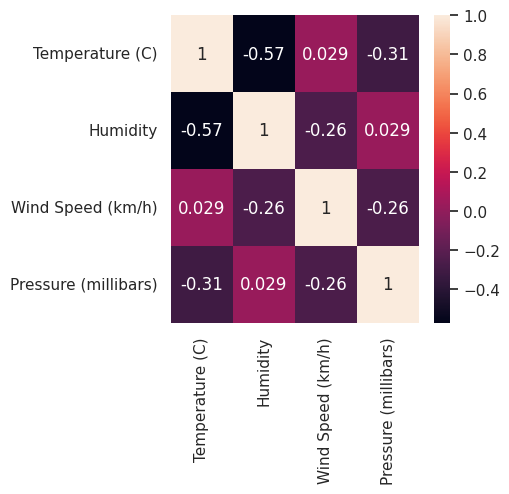

In [81]:
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(df_x_train_standardized.corr(), annot=True)

Assigning Model


In [82]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [83]:
predictions = lm.predict(x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean Squred Error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean squared error(Train) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_train, y_train_pred))
print('Root mean squared error(Train) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_train, y_train)
print('Accuracy (Train) :', round(score * 100, 4))

Mean squared error(Train) : 1.2092
Root mean squared error(Train) : 1.0996
Accuracy (Train) : 99.0078


In [86]:
predictions = lm.predict(x_test)
y_pred = pd.DataFrame(predictions, columns=['Predicted Apparent Temperature (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test, y_test)
print('Accuracy (Test) :', round(score * 100, 4))

Mean squared error(Testing) : 1.2022
Root mean squared error(Testing) : 1.0964
Accuracy (Test) : 99.0287
